# K-means FAF images: vessel segmentation

K - means algorith is a clustering method embedded within the category of unsupervised machine learning. Since we do not know the labels a.k.a clusters of the dataset we need to find categories for subsequently split those categories into clusters.

This approach can be especially useful for FAF image pre-processing. By using k - means we can standardise the method to be used later for analyses such as neovascularisation indices or leakage quantification.

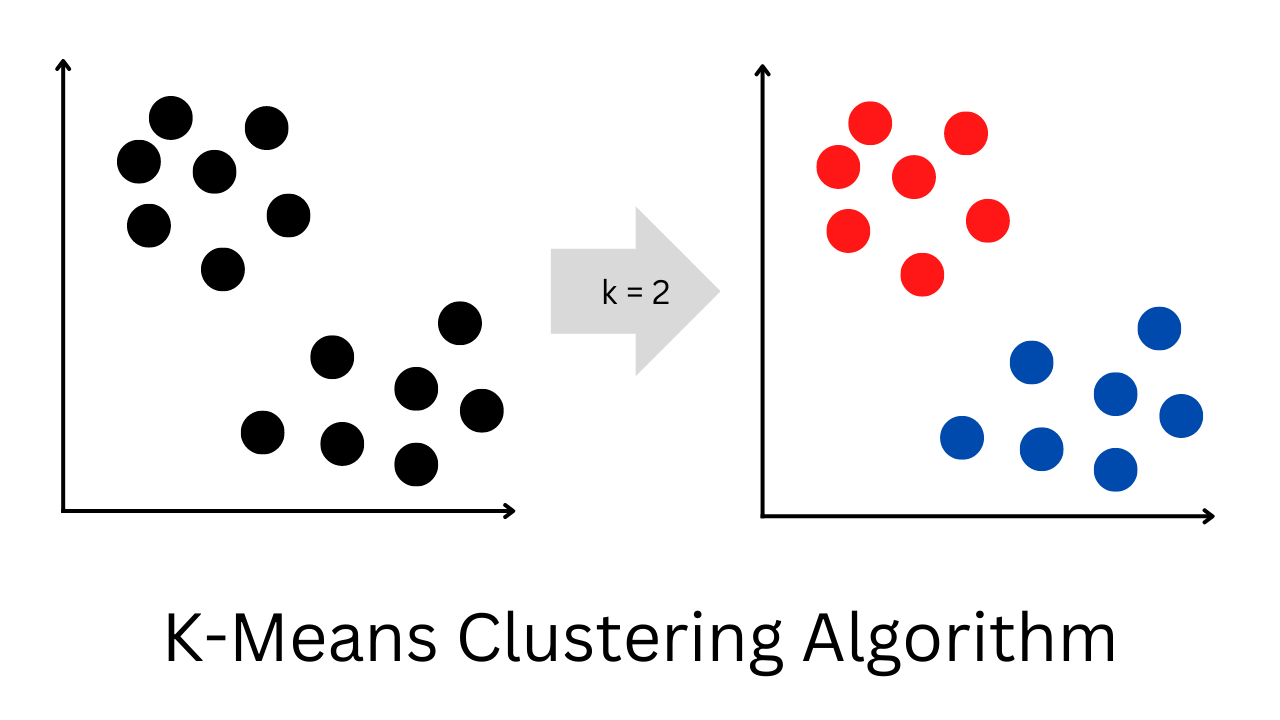

[1] A. O’Neill, “Implementing the K-means algorithm in Python,” LinkedIn, https://www.linkedin.com/pulse/implementing-k-means-algorithm-python-alex-o-neill/ (accessed Jun. 12, 2024).

## Code

In [2]:
# Calling the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

After loading the libraries, the image is uploaded using cv2 library and converted to grayscale

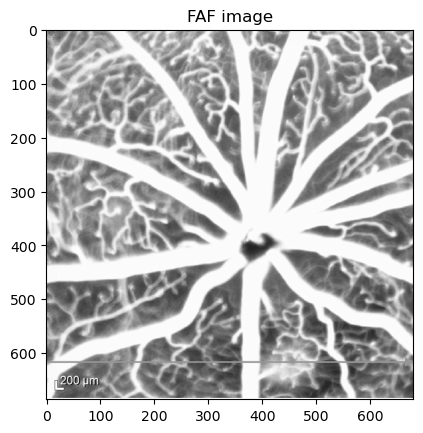

In [3]:
image_path = "C:/Users/alexg/Google Drive/Otros/Proyecto New Horizon/Datasets/K means segmentation/imageFAF.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('FAF image')
plt.show()

Pre procesing image for k-means. OpenCV k-means algorithm requires the input data to be of type float32. Therefore, pixel conversion (originally of type uint8, ranging from 0 to 255) to float32 is required.

In [12]:
image_pre = image.reshape((-1, 1))
image_pre = np.float32(image_pre)

Defining k-means criteria and apply k-means

In [14]:
# Specify how much (epsilon/precision) and when it is reached the algorith is done
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# Number of cluster. Two for us, vessels and fundus.
k = 2
# Applying k-means
_, labels, centers = cv2.kmeans(image_pre, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Make sure that the center values are in the same format as the original pixel values (values from 0 to 255).

In [15]:
centers = np.uint8(centers)
segmented_1 = centers[labels.flatten()] # assign centers to labels

The suggestion is to create a segmented image where each pixel is coloured according to its cluster centre. This results in an image where the segmented regions have uniform values.

In [16]:
# Reshaping of segmented image
segmented_1 = segmented_1.reshape((image_pre.shape))

Identify the cluster corresponding to blood vessels. We supose that blood vessels correspond to highest grey value cluster

In [17]:
v_cluster = 1 if centers[1] > centers[0] else 0

Create a mask for blood vessel and visualization

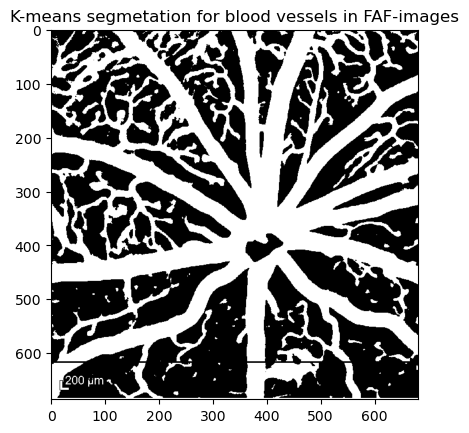

In [19]:
mask_v = np.zeros_like(image)
mask_v[labels.reshape(image.shape) == v_cluster] = 255 # Assign value 255 to vesssels (cluster 1) where boolean 
# condition condition is True
plt.imshow(mask_v, cmap = 'gray')
plt.title('K-means segmetation for blood vessels in FAF-images')
plt.show()
